In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from statistics import mean
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
df= pd.read_csv('C:/Users/yessm/Downloads/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Description de la dataset 
p (mbar): atmospheric pressure
T (degC):temperature
Tpot (K): potential temperature
Tdew (degC): dew point temperature
rh (%): relative humidity
VPmax (mbar): saturation water vapor pressure
VPact (mbar): actual water vapor pressure
VPdef (mbar): water vapor pressure deficit
sh (g/kg): specific humidity
H2OC (mmol/mol): water vapor concentration
rho (g/m**3): air density
wv (m/s): wind velocity
max. wv (m/s): maximum wind velocity
wd (deg): wind direction


In [3]:
nRow, nCol = df.shape
print(f'Il ya  {nRow} lignes et {nCol} colonnes')

Il ya  420551 lignes et 15 colonnes


In [4]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [7]:
df.columns=['DateTime','p','T','Tpot','Tdew','rh','VPmax','VPact','VPdef','sh','H2OC','rho','wv','maxWV','wd']
for col in ['wv', 'maxWV']:
    df[col] = df[col].replace(-9999.00, 0)

In [8]:
from datetime import datetime

df["DateTime"] = df["DateTime"].astype("datetime64[s]")

In [9]:
df["Hour"] = df["DateTime"].dt.hour
df["Year"] = df["DateTime"].dt.year
df["Month"] = df["DateTime"].dt.month
df["Day_of_Year"] = df["DateTime"].dt.dayofyear

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DateTime     420551 non-null  datetime64[ns]
 1   p            420551 non-null  float64       
 2   T            420551 non-null  float64       
 3   Tpot         420551 non-null  float64       
 4   Tdew         420551 non-null  float64       
 5   rh           420551 non-null  float64       
 6   VPmax        420551 non-null  float64       
 7   VPact        420551 non-null  float64       
 8   VPdef        420551 non-null  float64       
 9   sh           420551 non-null  float64       
 10  H2OC         420551 non-null  float64       
 11  rho          420551 non-null  float64       
 12  wv           420551 non-null  float64       
 13  maxWV        420551 non-null  float64       
 14  wd           420551 non-null  float64       
 15  Hour         420551 non-null  int6

<AxesSubplot:>

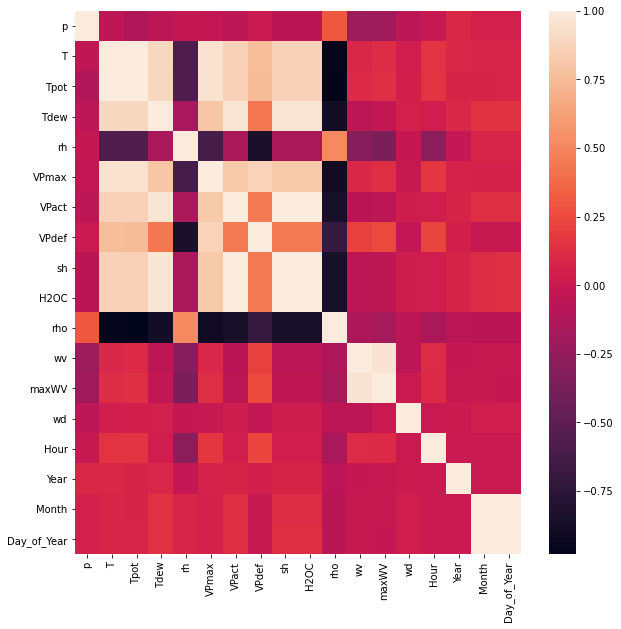

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# some Visualization 

<AxesSubplot:title={'center':'Histogramme des differents températures  '}, xlabel='T', ylabel='Frequency'>

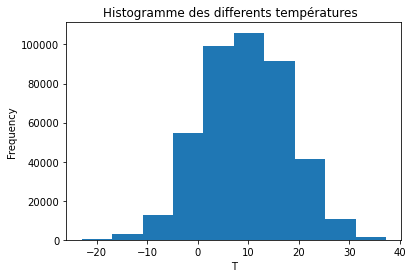

In [11]:
plt.title ("Histogramme des differents températures  ")
plt.xlabel("T")
df['T'].plot.hist()

on peut conclure que la température entre 10 et 15 est la plus fréquente (100000 fois ) et la temperature varie entre -25 et 38 

<AxesSubplot:title={'center':'Histogramme des différents relative humidity'}, xlabel='relative humidity', ylabel='Frequency'>

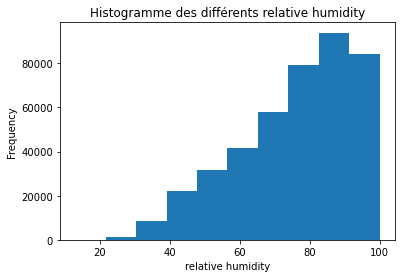

In [12]:
plt.title("Histogramme des différents relative humidity")
plt.xlabel("relative humidity")
df['rh'].plot.hist()

on peut conclure que la relative humidity entre 85 et 95 sont les  plus fréquents  (80000 fois ) et la Rh varie entre 21 et 100 

C:\Users\yessm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='T'>

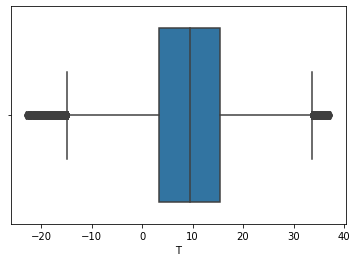

In [13]:
sns.boxplot(df['T']) 

C:\Users\yessm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rh'>

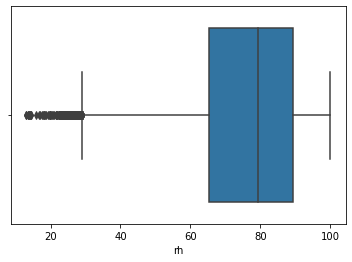

In [14]:
sns.boxplot(df['rh'])

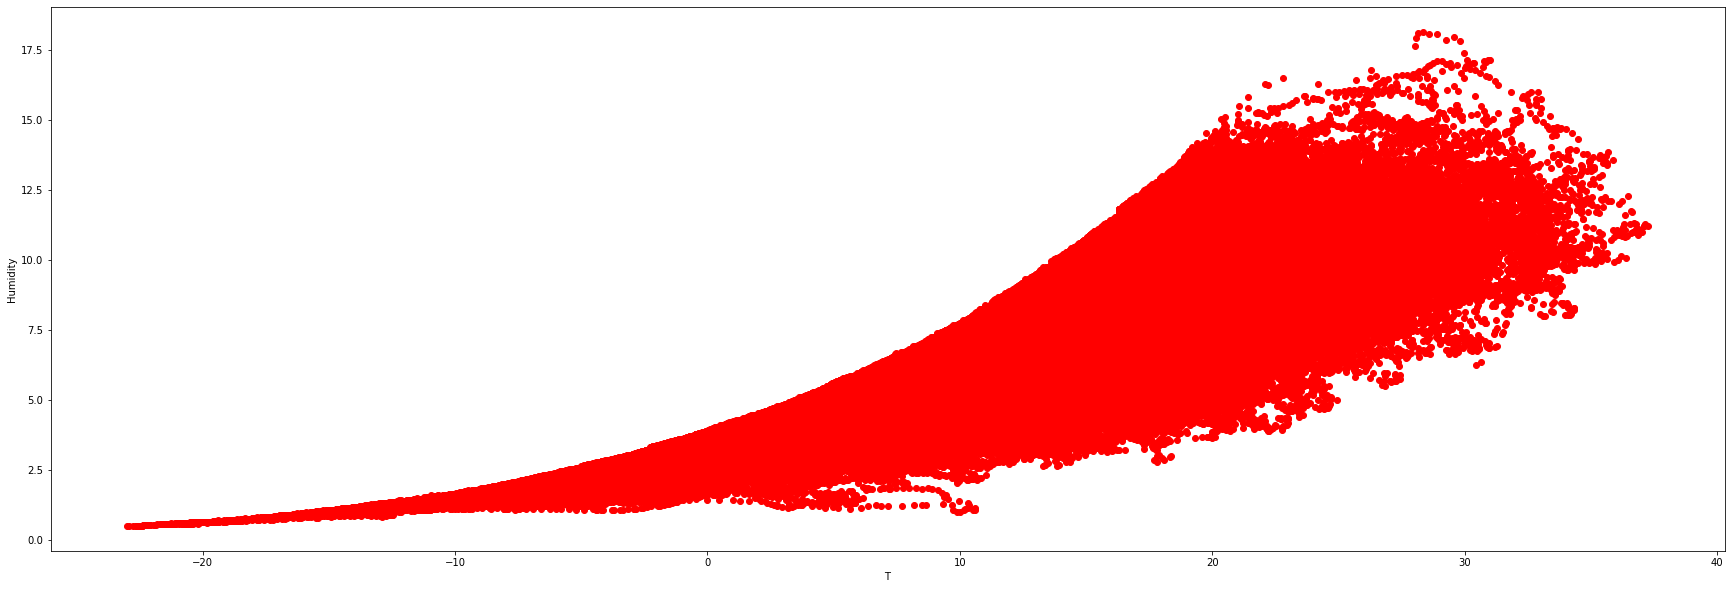

In [15]:
plt.figure(figsize=(30,10))
plt.xlabel("T")
plt.ylabel("Humidity")
x= df['T']
y = df['sh']
plt.scatter(x,y,marker='o',color="red")
        

# PolynomialRegression

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [17]:
y=df['T']
x=df[['sh','wv','wd','maxWV','VPact','p']]
XTrain,XTest,YTrain,YTest= train_test_split(x,y,test_size=0.20,random_state=30)
lr=LinearRegression()
poly= PolynomialFeatures(degree=2)
XTrain_=poly.fit_transform(XTrain)
lr.fit(XTrain_,YTrain)
XTest_=poly.fit_transform(XTest)
predicted = lr.predict(XTest_)
print("le MSE est égale à : ", metrics.mean_squared_error(YTest,predicted))

print("le R squared est égale à :" , metrics.r2_score(YTest,predicted))

le MSE est égale à :  11.598730361957497
le R squared est égale à : 0.8369885027601995


In [18]:
y=df['T']
x=df[['sh','wv','wd','maxWV','VPact','p']]
XTrain,XTest,YTrain,YTest= train_test_split(x,y,test_size=0.40,random_state=30)
lr=LinearRegression()
poly= PolynomialFeatures(degree=2)
XTrain_=poly.fit_transform(XTrain)
lr.fit(XTrain_,YTrain)
XTest_=poly.fit_transform(XTest)
predicted = lr.predict(XTest_)
print("le MSE est égale à : ", metrics.mean_squared_error(YTest,predicted))

print("le R squared est égale à :" , metrics.r2_score(YTest,predicted))

le MSE est égale à :  11.52021488580929
le R squared est égale à : 0.8374491569239025


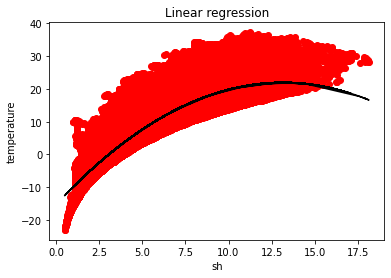

In [19]:
x= df["sh"].values.reshape(-1,1)
y= df["T"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("temperature")
plt.xlabel("sh")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

# Star Dataset

In [21]:
import pandas as pd
df2= pd.read_csv('C:/Users/yessm/Desktop/6 class csv.csv')
df2.head(20)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.120,0,Red,M
1,3042,0.000500,0.1542,16.600,0,Red,M
2,2600,0.000300,0.1020,18.700,0,Red,M
3,2800,0.000200,0.1600,16.650,0,Red,M
4,1939,0.000138,0.1030,20.060,0,Red,M
5,2840,0.000650,0.1100,16.980,0,Red,M
6,2637,0.000730,0.1270,17.220,0,Red,M
7,2600,0.000400,0.0960,17.400,0,Red,M
8,2650,0.000690,0.1100,17.450,0,Red,M
9,2700,0.000180,0.1300,16.050,0,Red,M


In [22]:
df2.columns=['Temperature','Luminosity','Radius','Abs_mag','Star type','Star color','Spectral Class']

nRow, nCol = df2.shape
print(f'Il ya  {nRow} lignes et {nCol} colonnes')

Il ya  240 lignes et 7 colonnes


In [23]:
df2['Star color'].unique()
df2['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Blue                    1
Yellowish               1
Blue white              1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
White-Yellow            1
Name: Star color, dtype: int64

In [24]:
df2.loc[df2['Star color']=='white','Star color']='White'
df2.loc[df2['Star color']=='Whitish','Star color']='White'
df2.loc[df2['Star color'].str.contains('Blue'),'Star color']='Blue'
df2.loc[df2['Star color'].str.contains('Yellow'),'Star color']='Yellow'
df2.loc[df2['Star color'].str.contains('yellow'),'Star color']='Yellow'
df2.loc[df2['Star color'].str.contains('Orange'),'Star color']='Yellow'
                                    

df2['Star color'].unique()
df2['Star color'].value_counts()

Red       112
Blue       97
Yellow     19
White      12
Name: Star color, dtype: int64

In [337]:
#one_hot=pd.get_dummies(df2['Spectral Class'])
#df2= df2.drop('Spectral Class',axis=1)
#df2=df2.join(one_hot)
df2["Spectral Class"]=df2["Spectral Class"].map({"A": 0, "B": 1, "F": 2, "G": 3, "K": 4, "M": 5, "O": 6})   #convert admitted variable into numerical
df2.head()


,Temperature,Luminosity,Radius,Abs_mag,Star type,Spectral Class,Blue,Red,White,Yellow
0,3068,0.002400,0.1700,16.12,0,5,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,5,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,5,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,5,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,5,0,1,0,0


In [25]:
one_hot=pd.get_dummies(df2['Star color'])
df2= df2.drop('Star color',axis=1)
df2=df2.join(one_hot)
df2

,Temperature,Luminosity,Radius,Abs_mag,Star type,Spectral Class,Blue,Red,White,Yellow
0,3068,0.002400,0.1700,16.12,0,M,0,1,0,0
1,3042,0.000500,0.1542,16.60,0,M,0,1,0,0
2,2600,0.000300,0.1020,18.70,0,M,0,1,0,0
3,2800,0.000200,0.1600,16.65,0,M,0,1,0,0
4,1939,0.000138,0.1030,20.06,0,M,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,O,1,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,O,1,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,A,0,0,1,0
238,9235,404940.000000,1112.0000,-11.23,5,A,0,0,1,0


<AxesSubplot:xlabel='Temperature', ylabel='Abs_mag'>

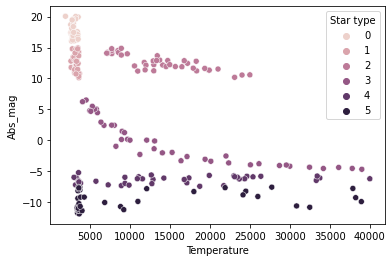

In [26]:
import seaborn as sns
sns.scatterplot(x='Temperature',y='Abs_mag',hue='Star type',data=df2)

<AxesSubplot:>

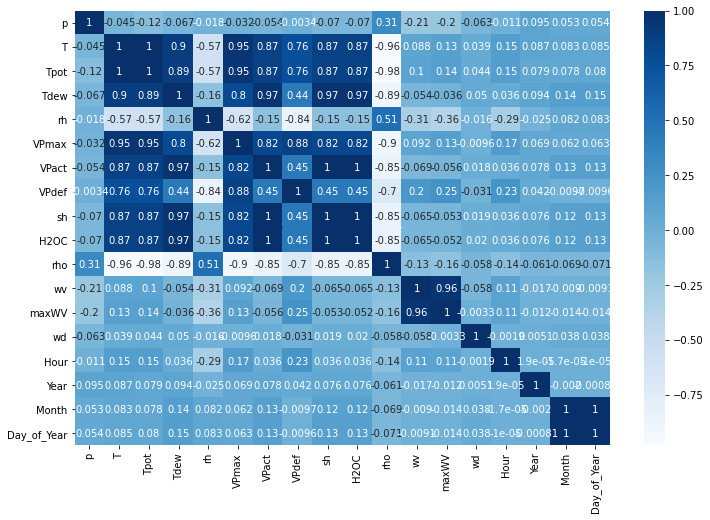

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True, cmap = 'Blues')

# KNN


In [30]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.6041666666666666


In [31]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))


Accuracy for k= 1 is: 0.6
Accuracy for k= 2 is: 0.6
Accuracy for k= 3 is: 0.62
Accuracy for k= 4 is: 0.58
Accuracy for k= 5 is: 0.69
Accuracy for k= 6 is: 0.65
Accuracy for k= 7 is: 0.62
Accuracy for k= 8 is: 0.69
Accuracy for k= 9 is: 0.62
Accuracy for k= 10 is: 0.6
Accuracy for k= 11 is: 0.6
Accuracy for k= 12 is: 0.58
Accuracy for k= 13 is: 0.6
Accuracy for k= 14 is: 0.62
Accuracy for k= 15 is: 0.67
Accuracy for k= 16 is: 0.6
Accuracy for k= 17 is: 0.65
Accuracy for k= 18 is: 0.62
Accuracy for k= 19 is: 0.62
Accuracy for k= 20 is: 0.65
Accuracy for k= 21 is: 0.67
Accuracy for k= 22 is: 0.62
Accuracy for k= 23 is: 0.67
Accuracy for k= 24 is: 0.69
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.69
Accuracy for k= 27 is: 0.73
Accuracy for k= 28 is: 0.69
Accuracy for k= 29 is: 0.77


# Random Forest


In [32]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)  #splitting data with test size of 25%

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.9875


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df2[['Temperature','Luminosity','Abs_mag','Radius']]
y = df2['Star type']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)  #splitting data with test size of 25%

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(confusion_matrix(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print("Accuracy score: ", score)

[[12  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  1  0 17  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 14]]
Accuracy score:  0.9875


# Linear Regression

In [34]:
from sklearn.model_selection import train_test_split
x = df2[['Abs_mag','Radius','Blue','Red','Yellow','White']]
y = df2['Star type']
XTrain,XTest,YTrain,YTest= train_test_split(x,y,test_size=0.20,random_state=30)
lr=LinearRegression()
poly= PolynomialFeatures(degree=2)
XTrain_=poly.fit_transform(XTrain)
lr.fit(XTrain_,YTrain)
XTest_=poly.fit_transform(XTest)
predicted = lr.predict(XTest_)
print("le MSE est égale à : ", metrics.mean_squared_error(YTest,predicted))

print("le R squared est égale à :" , metrics.r2_score(YTest,predicted))


le MSE est égale à :  0.03137015595333467
le R squared est égale à : 0.9886196127670472


<AxesSubplot:xlabel='Spectral Class', ylabel='star color'>

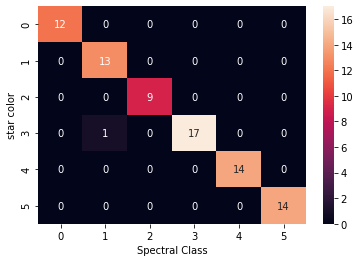

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['star color'], colnames=['Spectral Class'])
sns.heatmap(confusion_matrix, annot=True)

In [36]:
#classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         9
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        14

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

